# Combinatorics and probability distributions

Combinatorics is an important area of mathematics. We apply combinatorics to compute the possible combinations or permutations of a combination of events. As such, combinatorics are also one of the most effective tools for being able to make probability calculations. We learn about some basic properties of discrete probabilities:

- Understand the axiom's probability
- Use set operations on probabilities
- Compute probabilities for independent and mutually exclusive events
- Apply conditional probabilities

Let's begin with a combinatorics example: Say you want to compute the number of possible sandwiches we can order at a sandwich shop with a limited menu: 4 bread choices, 5 meat choices, 4 toppings.  How many unique sandwich combination can we order by picking one item from each category?   

$$4 * 5 * 4 = 80$$

You can see that for this problem we just need to multiply the number of choices for each class. This is an example of the **multiplication principle** of combinatorics.

In [2]:
from __future__ import division
import numpy as np
import itertools
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_palette('muted')
sns.set_style('ticks')
%matplotlib inline

In [3]:
breads = ['white', 'wheat', 'italian', 'sevengrain']
meats = ['ham', 'turkey', 'chicken', 'pastrami', 'meatballs']
toppings = ['mustard', 'mayo', 'salt_pepper', 'oil_vinegar']

In [4]:
sizes = list(map(len, [breads, meats, toppings]))
np.product(sizes)

80

For many of these combinatorics problems, we can use the `itertools` package to save time and simplify the code. For example, say we want the list of all 80 sandwhich combinations.

In [5]:
list(itertools.product(breads, meats, toppings))[:10]

[('white', 'ham', 'mustard'),
 ('white', 'ham', 'mayo'),
 ('white', 'ham', 'salt_pepper'),
 ('white', 'ham', 'oil_vinegar'),
 ('white', 'turkey', 'mustard'),
 ('white', 'turkey', 'mayo'),
 ('white', 'turkey', 'salt_pepper'),
 ('white', 'turkey', 'oil_vinegar'),
 ('white', 'chicken', 'mustard'),
 ('white', 'chicken', 'mayo')]

If we need these combinations one at a time, there's no need to generate them all at once using `list` (as we did above). Instead we can call `next` to generate the next item until we are finished.

In [6]:
all_sandwiches = itertools.product(breads, meats, toppings)
next(all_sandwiches)

('white', 'ham', 'mustard')

In [7]:
next(all_sandwiches)

('white', 'ham', 'mayo')

In [8]:
next(all_sandwiches)

('white', 'ham', 'salt_pepper')

### Exercise

Loop over `all_sandwiches` and print all sandwiches that have mayo and do not have ham. There are different ways of doing it.

In [9]:
all_sandwiches = itertools.product(breads, meats, toppings)
for s in all_sandwiches:
    if (s[2] == 'mayo') & (s[1] != 'ham'):
        print(s)

('white', 'turkey', 'mayo')
('white', 'chicken', 'mayo')
('white', 'pastrami', 'mayo')
('white', 'meatballs', 'mayo')
('wheat', 'turkey', 'mayo')
('wheat', 'chicken', 'mayo')
('wheat', 'pastrami', 'mayo')
('wheat', 'meatballs', 'mayo')
('italian', 'turkey', 'mayo')
('italian', 'chicken', 'mayo')
('italian', 'pastrami', 'mayo')
('italian', 'meatballs', 'mayo')
('sevengrain', 'turkey', 'mayo')
('sevengrain', 'chicken', 'mayo')
('sevengrain', 'pastrami', 'mayo')
('sevengrain', 'meatballs', 'mayo')


Run the next line and explain the result we get.

In [10]:
list(all_sandwiches)

[]

Create a `DataFrame` called `sandwiches` from the list of all sandwich combinations and show the first 5 lines using `head`. Use `['breads', 'meats', 'toppings']` as column names.

In [11]:
all_sandwiches = itertools.product(breads, meats, toppings)
pd.DataFrame(all_sandwiches, columns = ['breads', 'meats', 'toppings']).head()

,breads,meats,toppings
0,white,ham,mustard
1,white,ham,mayo
2,white,ham,salt_pepper
3,white,ham,oil_vinegar
4,white,turkey,mustard


### End of exercise

## Factorials, permutations and combinations

Factorials are a way to compute the number of ways to order $N$ things. We use the term **Permutations** to describe the number of ways you can order some objects or events. This is where **factorials** arise:

$$Number\ of\ ways\ to\ order\ N\ things = N!$$  

Let's say you have 5 new books on probability you wish to put on a shelf (having read them cover-to-cover no doubt!). How many ways can you order them?  

$$5 * 4 * 3 * 2 * 1 = 5! = 120$$

In [12]:
import math
math.factorial(5)

120

This is another application of the multiplication principle. 

Easy enough, so far. But let's say we want to find the number of **permutations** of $k$ unique items chosen from $N$ total items. We can compute the number of possible permutations as:

$$\frac{N!}{(N - k)!}$$

Say for example that I can order 4 beers out of a total of 10 beers. The order I drink my 4 beers in the sampler might matter because tastes offect each other. Maybe the tastes will be a bit different if I drink stout before I drink a red ale. Because order matters, we need the number of permutations of 4 beers out of a total of 10:

$$\frac{10!}{(10 - 4)!} = 10 * 9 * 8 * 7 = 5040$$

Computing factorials can be tricky. A 64 bit unsigned integer can represent numbers as large as $2^{64} = 9.2E18$. However $21! = 5.1E19$. In practice, computation of factorials is done on ratios to make the problem tractable. For example, we just wrote our beer example in a tractable form:

$$\frac{10!}{6!} = \frac{10!}{(10-4)!} = 10 * 9 * 8 * 7$$

We never had to actually compute the largest number $10!$. In fact, we just multiplied 4 numbers. 

In [15]:
p = list(itertools.permutations(range(10), 4))
print("Number of permutations: {:,}".format(len(p)))
print("A few examples:")
p[1000:1002]

Number of permutations: 5,040
A few examples:


[(1, 9, 7, 8), (1, 9, 8, 0)]

What if order does not matter? I may just want to find all unique combinations of k items of N choices. For example, for the beer example when order does not mater, there are $10$ choices and I want to pick $4$ unique choices. In the language of combinatorics, we say that the above quantity is $10$ **choose** $4$, which can be writen:

$$\frac{10!}{4!(10 - 4)!} = \binom{10}{4}$$

We say that $N$ choose $k$ is a **combinations** since order does not matter. More generally we compute combinations with the formula:

$$\frac{N!}{k!(N - k)!} = \binom{N}{k}$$

From these formulas you can see that combinations are less than permutations by a factor of $k!$.

In [13]:
c = list(itertools.combinations(range(10), 4))
print("Number of combinations: {:,}".format(len(c)))
print("A few examples:")
c[:10]

Number of combinations: 210
A few examples:


[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6)]

For our example, we can visualize how this process works with **Pascal's triangle**. You can see an example below. 

![Pascal's triangle](../images/pascal-triangle.gif)

In this case we find $10$ choose $4$ by counting down 10 rows and over 4 elements. Voila! we have the value we expect! 

More generally, row $n$ in Pascal's triangle shows 

$$\binom{n}{0}, \binom{n}{1}, \cdots, \binom{n}{n}$$ which leads to the interesting identity

$$\binom{n}{0} + \binom{n}{1} + \cdots + \binom{n}{n} = 2^n$$

Notice that Pascal's triangle is symmetric. This illustrates an important symmetry property of combinations. Notice that:

$$\binom{N}{k} = \binom{N}{N-k}$$

You can also see from the animation that

$$\binom{n}{k} = \binom{n-1}{k} + \binom{n-1}{k-1}$$

which can also be shown using some simple algebra. The above result shows that we can compute the number of combinations by just computing Pascal's triangle, which means using only summations instead of multiplications!

Another interesting side-note, left for you to proove is the relationship between the above property and the identity $2^0 + 2^1 + \cdots + 2^k = 2^{k+1} - 1$ (which can be proved using mathematical induction).

The intuition behind the above equality is pretty simple. Let's say you have been so far serving a beer sampler of 4 beers out of a choice of 10, but you now offer a new choice of beer and want to allow people to order a sampler of 5 beers (so we went from $n = 10$ to $n = 11$ and from $k = 4$ to $k = 5$. How many combinations are there now?

In [16]:
c = list(itertools.combinations(range(10 + 1), 4 + 1))
print("Number of combinations: {:,}".format(len(c)))

Number of combinations: 462


But another way to look at it is to ask how many combinations are there that involve the new beer and how many that don't. The number of combination that involve the new beer is easy to get, it's the same as the number of ways we had to choose 4 beers out of 10, except we also add the new beer so we have 5 in total. The number of combinations that don't have the new beer is also easy: it's the number of combinations of 5 beers out of 10 beer. Hence we get:

In [17]:
c_with = list(itertools.combinations(range(10), 4 + 1))
c_without = list(itertools.combinations(range(10), 4))
print("Number of combinations: {:,}".format(len(c_with) + len(c_without)))

Number of combinations: 462


In [18]:
len(c_with)

252

Notice how we get the same answer either way.

**Fun note:** there are $52!$ ways to shuffle deck of cards, or combinations. It is likely that each shuffle is unique in the history of the world!

### Exercise

One interesting application of combinatorics are **permutation tests**, and the easiest way to explain them is through an example. Let's say that you are given measurements for two rather small samples, and you're wondering if  the difference of the averages between the two groups is significant or not.

In [ ]:
group_1 = [22, 11, 17, 18, 21]
group_2 = [16, 19, 20, 25]
observed_diff = abs(np.mean(group_1) - np.mean(group_2))
print(observed_diff)

2.1999999999999993


One way to answer the question is the following: Let's first combine the two groups, and then draw randomly 5 people and put them in group 1 and the other 4 in group 2.

- How many ways are there to do this?
- Write a program that creates a list where each element is such a mix. For example, the first element of the list could look like `[[22, 11, 17, 18, 25], [16, 19, 20, 21]]`. HINT: Use `itertools.combinations`.

In [23]:
all_measurements = group_1 + group_2
all_measurements

all_combos = list([list(comb), list(set(all_measurements).difference(set(comb)))] for comb in itertools.combinations(all_measurements, 5))
all_combos[:10]

[[[22, 11, 17, 18, 21], [16, 25, 19, 20]],
 [[22, 11, 17, 18, 16], [25, 19, 20, 21]],
 [[22, 11, 17, 18, 19], [16, 25, 20, 21]],
 [[22, 11, 17, 18, 20], [16, 25, 19, 21]],
 [[22, 11, 17, 18, 25], [16, 19, 20, 21]],
 [[22, 11, 17, 21, 16], [25, 18, 19, 20]],
 [[22, 11, 17, 21, 19], [16, 25, 18, 20]],
 [[22, 11, 17, 21, 20], [16, 25, 18, 19]],
 [[22, 11, 17, 21, 25], [16, 18, 19, 20]],
 [[22, 11, 17, 16, 19], [25, 18, 20, 21]]]

- Calculate the difference of averages between the two groups for each element of the above list.

In [18]:
perm_diffs = [np.mean(c[0]) - np.mean(c[1]) for c in all_combos]
perm_diffs[:10]

[-2.1999999999999993,
 -4.449999999999999,
 -3.1000000000000014,
 -2.6499999999999986,
 -0.3999999999999986,
 -3.1000000000000014,
 -1.75,
 -1.3000000000000007,
 0.9499999999999993,
 -4.0]

- Finally, find what percentage of these differences are higher in absolute value than the observed difference we obtained above. We refer to this as a **p-value** (more on p-values in later lectures).

In [19]:
np.mean(np.abs(perm_diffs) > np.abs(observed_diff))

0.4523809523809524

Your answer should look close to the answer below, where we use the `mlxtend` package to perform the same permutation test.

In [22]:
from mlxtend.evaluate import permutation_test
p_value = permutation_test(group_1, group_2, method = 'approximate', num_rounds = 10000, seed = 0)
print(p_value)

0.45908738292


- What should be the conclusion?

### End of exercise

Now that you have learned a bit about counting and combinatorics, let's put this knowledge to use by computing some probabilities. 

## Probability for dice

Let's start with some simple examples of computing probabilities for rolls of a pair of dice. Once we can use combinatorics to enumerate all possible states following a series of events, we can also compute probabilities of these events. 

Let's start by enumerating all of the possible end states from throwing two dice. We will assume that these dice are 'fair'.  In other words, there is an equal probability that any face of each dice will land pointing up. In terms of probability, we say that the distribution of scores for each dice follows a **uniform distribution**. Furthermore, we assume that the dice are identical and that the score for each dice is not dependent on the other dice. In the terminology of probability, we can now say that the score of each dice is **independent identically distributed**, or **iid**.

The code in the cell below computes as table with all possible outcomes. Run this code and examine the results.

In [24]:
two_dice = list(itertools.product(range(1, 7), range(1, 7)))
two_dice[:4]

[(1, 1), (1, 2), (1, 3), (1, 4)]

As a first step in computing the probabilities, we need to find how many ways we can get into each state. In the case of the dice, how many ways can we roll each score (sum of the numbers shown on the upper sides of the two dice)? The figure below shows an example of the number of ways we can roll a 7 or a 10.

![Two dice sample space](../images/two-dice.jpg)

### Exercise

1. Store the result of throwing two dice into a `DataFrame` and compute two new columns: one called `roll_sum` which shows the total of the two throws, and one called `is_double` which is when the two numbers match.

In [24]:
two_dice = pd.DataFrame(itertools.product(range(1, 7), range(1, 7)), columns = ['one', 'two'])
two_dice['roll_sum'] = two_dice.apply(sum, axis = 1)
two_dice.head()

,one,two,roll_sum
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,6


2. Next obtain counts for each unique value of `roll_sum`. Examine this table. Which score is the most likely, and  which scores are least likely?

In [25]:
two_dice['roll_sum'].value_counts()

7     6
6     5
8     5
5     4
9     4
4     3
10    3
3     2
11    2
2     1
12    1
Name: roll_sum, dtype: int64

3. Turn the above counts into probabilities (by dividing by the total). What you are looking at is an example of a **discrete distribution**, descrete because the number of choices are limited, and distribution because the numbers represent probabilities.

In [26]:
two_dice['roll_sum'].value_counts(normalize = True)

7     0.166667
6     0.138889
8     0.138889
5     0.111111
9     0.111111
4     0.083333
10    0.083333
3     0.055556
11    0.055556
2     0.027778
12    0.027778
Name: roll_sum, dtype: float64

4. Now represent the distribution of `roll_sum` using a bar plot. HINT: Use `sns.countplot`.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


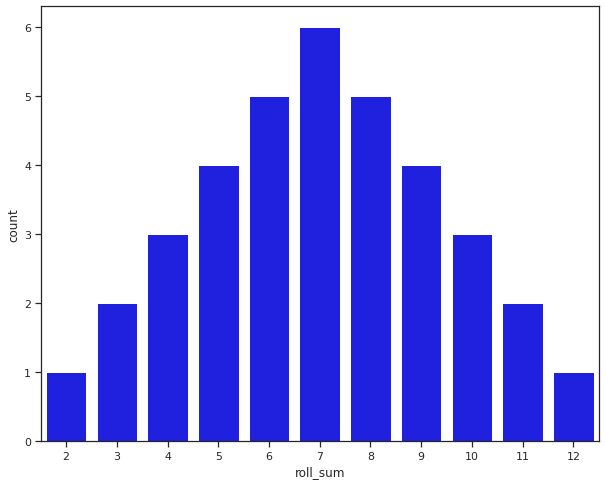

In [27]:
sns.countplot(two_dice['roll_sum'], color = 'blue');

The plot would look the same whether we use the counts or the probabilities (but the scale of the y-axis would be different). In statistics, when the bar plot uses counts, we call it a **frequency plot** and when it uses probabilites we call it a **relative frequencies plot**.

### End of exercise

Very often we do not have access to a dataset of all possible outcomes (sample space) that we can query to see how probable different outcomes are (or any set of outcomes, which we called an **event**). This can be because there are far too many outcomes to list them all or because such a detailed data is simply not available. Even if we had this data, querying it every time we wanted to find the probability of some event is not the a very efficient way to get the answer. Instead, we can find the probability associated with each outcome in the sample space once and save it for future reference. This is basically what a probability distribution is: a sort of lookup table that we refer to when we need to find the probability of some event.

## Basics of probability

We will now investigate some basics of probability in a bit more detail.  

A **discrete distribution** is a probability distribution describing a process with discrete outcomes. By discrete outcomes, we mean outcomes that have specific states which we can count. We have already investigated an example of a discrete process when we examined the outcome of dice throws. Each dice lands with a certain side up and the sum of the two numbers is the total score. 

For a discrete distribution, the probability of an event, A, is the number of ways A can occur, divided by the number of total possible outcomes in our **sample space**, S. Let's make this concrete with an example. In the figure below there are 10 events in S, 6 in set A, and 4 in set B.

![Sample space](../images/sample-space.jpg)

The probability of the events in a subset, A, given a set of possible events in the sample space, S, can be computed as follows:

$$P(A) = \frac{N(A)}{N(S)}$$

In this case there are 10 events in S, 6 events in subset A, and 4 in subset B. We can compute the probabilities of A and B like this:

$$P(A) = \frac{6}{10} = \frac{3}{5} = 0.6$$
$$P(B) = \frac{4}{10} = \frac{2}{5} = 0.4$$

As you can see, we are treating events as mathematical sets and applying set operations to define the **intersection** $P(A \cap B) = \frac{2}{10}$ and **union** $P(A \cup B) = \frac{8}{10}$ of two events $A$ and $B$, as well as the **negation** of event $A$: $P(A') = 1 - P(A) = \frac{4}{10}$.

You can use this basic operations to create more complex operations. For example:

$$P((A \cup B)') = P(A' \cap B') = P(C) = \frac{2}{10} = 0.2$$

In general, for any two events $A$ and $B$ we have:

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

where $P(A \cap B) = 0$ if the two events are **mutually exclusive**, i.e. they can't happen at the same time.

As a side note, an alternative to expressing events in terms of probability is using **odds**, which are the ratio of the number of ways an event can occur to the number of ways it can not occur. Sometimes we say that **odds** are the count of events in favor of an event vs. the count against the event.

For example, if you flip a fair coin the odds of getting heads are $1:1$ (1 in 1). Since there are only two possible equally likely outcomes in the coin flip, we say the odds of the outcome are even. As another example, if you roll a single fair dice your odds of rolling a 6 are $1:5$ (1 in 5).

### Exercise

Return to the data set of a roll of two dice. 

In [28]:
two_dice = list(itertools.product(range(1, 7), range(1, 7)))
two_dice = pd.DataFrame(two_dice, columns = ['one', 'two'])
two_dice['roll_sum'] = two_dice.apply(sum, axis = 1)
two_dice.head()

,one,two,roll_sum
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,6


Let $A$ be the event that the score (`roll_sum`) is less than or equal to 3.  
Let $B$ be the event that the score (`roll_sum`) is even.  
Let $C$ be the event that the score (`roll_sum`) is greater than 10.

1. Find $P(A)$. HINT: Using `value_counts` with `normalize = True` is one way to do it, but there are other ways too.

In [29]:
prob_all = two_dice['roll_sum'].value_counts(normalize = True).to_dict()
prob_all = pd.DataFrame(prob_all.items(), columns = ['S', 'prob'])

prob_A = prob_all.query('S <= 3')['prob'].sum()
print(prob_A)

0.08333333333333333


2. Find the probability of $A$ or $C$, in other words $P(A \cup C)$. Are the two events mutually exclusive?

In [30]:
prob_A_or_C = prob_all.query('S <= 3 or S > 10')['prob'].sum()
print(prob_A_or_C)

# because A and C are mutually exclusive, we can also use P(A or C) = P(A) + P(C)
prob_C = prob_all.query('S > 10')['prob'].sum()
print(prob_A + prob_C)

0.16666666666666669
0.16666666666666666


3. Find the probability of $A$ or $B$, in other words $P(A \cup B)$. Are the two events mutually exclusive? HINT: Use the modulo operator `%`.

In [31]:
prob_A_or_B = prob_all.query('S <= 3 or S % 2 == 0')['prob'].sum()
print(prob_A_or_B)

0.5555555555555556


4. Confirm that $P(A \cup B) = P(A) + P(B) - P(A \cap B)$.

In [32]:
prob_B = prob_all.query('S % 2 == 0')['prob'].sum()
prob_A_and_B = prob_all.query('S <= 3 and S % 2 == 0')['prob'].sum()
print(prob_A + prob_B - prob_A_and_B)

0.5555555555555556


### End of exercise

## Conditional probability

**Conditional probability** is the probability that event A occurs **given that** (or conditioned on the fact that) event B has occurred. We can write conditional probability as follow, which we say is the probability of A given B:

$$P(A|B)$$

We can work out this conditional probability as follows:

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{2}{10}}{\frac{4}{10}} = \frac{2}{4} = \frac{1}{2}$$

If event A is **independent** of B, then $P(A|B) = P(A)$ which implies that $P(A \cap B) = P(A)P(B)$.

And with a little bit of algebra it can be shown that independence is a symmetric relationship, meaning that $P(A|B) = P(A)$ implies $P(B|A) = P(B)$ and vice versa.

It's important to distinguish between **mutually exclusive events and independent events**: mutually exclusive events are events that cannot happen together, so $P(A \cap B) = \emptyset$ (the empty set), whereas independent events are events that cannot influence each other, so information about one doesn't affect what we know about the other, so we can write $P(A \cap B) = P(A)P(B)$.

### Exercise

Many probability questions require careful attention to the way it is phrased in order to get it right. Here's an example:

- A family has two children, one of which is a girl. What is the probability that the other child is a boy?
- A family has two children and the first one is a girl. What is the probability that the other child is a boy?

As you can see, slight variations in the way the problem is phrased can change the results. It's also important to try and state the assumptions made by the problem, and challenge them if they seem loose.

These problems can be extended to other variants, some of which are [quite counter-intuitive](https://en.wikipedia.org/wiki/Boy_or_Girl_paradox).

Of the conditions stated here, specify which ones implies $A$ and $B$ are independent events and which ones imply that they are mutually exclusive.

1. $P(A \cup B) = P(A)+P(B)$
1. $P(A \cup B) = P(A)+P(B)-P(A)P(B)$
1. $P(A \mid B) = 0$
1. $P(A \mid \neg B) = P(A)$

### End of exercise

Let's try an example of using conditional probabilities to work out the chance of having a rare disease. The scenario is as follows:

1. Sickle cell anemia is a serious, but fairly rare disease.
 - Let $S$ be the event that a patient has the disease, and let $P(S) = \frac{1}{3200} = 0.0003125$.
 - Let the plus sign ($+$) be the event that a patient tests positive and the minus sign ($-$) that they test negative.
2. A medical company claims that its test is 99% accurate on people with and without the disease, i.e. $P(+ | S) = 0.99$ and $P(- | S') = 0.99$. These numbers are called **sensitivity** and **specificity** in the medical field.
  
On the surface, it seems that a 99% reliable test should be rather good. But, let's dig into the conditional probabilities and see how things really work out. 

The figure below shows a **conditional probability tree** for this problem. We will represent it both as a tree, and (in case you prefer the second visual) as a rectangle with colored areas to show the conditions, and if the whole rectangle is assumed to have an area of 1, then each box within it has an area equal to the join probability. If on the other hand we want to consider the left and right sides separately as having areas of 1, then each box has an area equal to the conditional probabilities.

![Conditional probability](../images/probability-tree-vs-box.jpg)

If you follow the tree from the root you can visualize the computation of probabilities for each of the 4 possible outcomes of a test on a patient. Let's summarize the conditional probabilities we need to compute for these outcomes:

- $P(\oplus | S)$ is the conditional probability the test will correctly identify a patient with the disease. 
- $P(- | S)$; is the conditional probability of a negative test for a patient with the disease. We call this situation a **Type II Error** or **False Negative**.
-  $P(\oplus | S')$ is the conditional probability a patient with no disease will test positive. We call this situation a **Type I Error** or **False Positive**.
- $P(- | S')$; is the conditional probability of a negative test for a patient who does not have the disease.

Let's start with the easy cases. We know the probability of a patient having the disease and we know the accuracy of the test. In the code cell below, create and execute the code to compute the conditional probabilities of a positive test given the patient has the disease, and a negative test given the patient does not have the disease. 

In [33]:
prob_has_disease = 0.0003125
prob_no_disease = 1 - prob_has_disease
prob_test_correct = 0.99
prob_test_incorrect = 1 - prob_test_correct
prob_true_positive = prob_has_disease * prob_test_correct
prob_true_negative = prob_no_disease * prob_test_correct
(prob_true_positive, prob_true_negative)

(0.000309375, 0.9896906249999999)

So far, so good. Next, let's compute the conditional probabilities for the cases where our test is in error. In the code cell below, create and execute the code to compute the conditional probabilities of a negative test given that the patient has the disease, and a positive test given that the patient does not have the disease. Compare these results to the conditional probabilities you computed above. 

In [34]:
prob_false_negative = prob_test_incorrect * prob_has_disease
prob_false_positive = prob_test_incorrect * prob_no_disease
(prob_false_negative, prob_false_positive)

(3.1250000000000027e-06, 0.00999687500000001)

Given these results, do you think this test is actually useful? Why?

Let's do one final check. In the cell below, create and execute the code to compute the sum of the probabilities of all the possible outcomes. Does the sum equal 1.0? 

In [35]:
prob_true_positive + prob_true_negative + prob_false_positive + prob_false_negative

0.9999999999999999

### Exercise

Let's return to our dataset of two dice throws.

In [36]:
two_dice = list(itertools.product(range(1, 7), range(1, 7)))
two_dice = pd.DataFrame(two_dice, columns = ['one', 'two'])
two_dice.head()

,one,two
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


Let $E_1$ be the event that the first die shows an even number.  
Let $E_2$ be the event that the second die shows an even number.  

1. Find the probability that the first die shows an even number and the second die shows an even number, in other words $P(E_1 \cap E_2)$.

In [37]:
two_dice['one_even'] = two_dice['one'] % 2 == 0
two_dice['two_even'] = two_dice['two'] % 2 == 0

prob_E1 = two_dice['one_even'].value_counts(normalize = True)[True]
prob_E2 = two_dice['two_even'].value_counts(normalize = True)[True]
prob_E1_and_E2 = (two_dice['one_even'] & two_dice['two_even']).value_counts(normalize = True)[True]

print(prob_E1_and_E2)

0.25


2. Find the probability that the second die shows an even number, given that the first die shows an even number, in other words $P(E_2 | E_1)$.

In [38]:
prob_E2_given_E1 = prob_E1_and_E2 / prob_E1
print(prob_E2_given_E1)

0.5


3. Show that the $E_1$ and $E_2$ are independent events, in other words show that $P(E_1 \cap E_2) = P(E_1) P(E_2)$.

In [39]:
# there are two ways to get the probability, and both should show the same result
print(prob_E1 * prob_E1) # since they are independent, we can just multiply them
print((two_dice['one_even'] & two_dice['two_even']).value_counts(normalize = True)[True]) # or compute it directly

0.25
0.25


### End of exercise

# Assignment

The Monty Hall problem we learned in class shows the importance of working out the math correctly and not letting "intuition" lead us down the wrong path when dealing with probabilities. Make sure to review it again because it will help with this assignment too. In this assignment, we learn about another such example. At first blush, the answer may seem obvious, but your job is to show the right answer using the rules of probability we learned in the lecture.

Here are two similar-sounding questions with a suble difference between them. As you will see, the subtle difference enough to make the problems and their solutions challenging and interesting:

1. In families with 2 daughters, what's the probability that at least one daughter born on a Thursday? <span style="color:red" float:right>[10 point]</span>

In [25]:
import random

In [33]:
1 - ((6/7) * (6/7))

0.26530612244897966

Another way of looking at this question is the opposite of: "what are the odds that neither daughter is born on a Thursday?". This calculation is very simple, for both daughters they have a 6 in 7 chance of being born NOT on Thursday, and so we take the joint probability of those two and subtract it from 1 to get the probability that either daughter is born on Thursday. Answer = ~26.5%

It is reassuring knowing that the total probability adds up to 1, since we are subtracting from 1.

2. In families with 2 daughters, what's the probability that at least one daughter is named Leila? Let's assume that on average 1 out of every 7 girl is named Leila, and that two girls from the same family can't have the same name. <span style="color:red" float:right>[15 point]</span>

In [34]:
(1/7) + ((6/7) * (1/7))

0.26530612244897955

Okay this result puzzled me for sure. I wasn't expecting the same probability.

Two cells above you can see the odds worked out. First is 1/7 (the odds that the 'first' daughter is named Leila), then PLUS the odds that the first daughter WASN'T but the second daughter WAS named Leila. To my surprise this is the same odds that the two daughters were both born on a thursday (or just the same day).

In [43]:
round((1/7) + ((6/7) * (1/7)) + ((6/7) * (6/7)), 9) == 1

True

The next cell shows that the total probability does in fact add up to 1. It's the same probability from before PLUS the odds that neither are named Leila. This number is rounded to the nearest 1 billionth.

Here are some other probability problems that have generated debates and helped us better understand the nature of probability and randomness:

- [Boy and girl paradox](https://en.wikipedia.org/wiki/Boy_or_Girl_paradox)
- [Bertrand paradox](https://en.wikipedia.org/wiki/Bertrand_paradox_(probability))
- [The birthday problem](https://en.wikipedia.org/wiki/Birthday_problem)
- [The two envelope problem](https://en.wikipedia.org/wiki/Two_envelopes_problem)
- [St. Petersburg paradox](https://en.wikipedia.org/wiki/St._Petersburg_paradox) (a more complex example)

# End of assignment